<a href="https://colab.research.google.com/github/a-bar06/Machine-Learning-/blob/main/student_performance_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STUDENT PERFORMANCE PREDICTOR**

##  Problem Statement
The objective of this project is to predict student academic performance using machine learning techniques based on study habits and academic indicators.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import files
files.upload()

Saving student_data.csv to student_data.csv


{'student_data.csv': b'school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3\nGP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6\nGP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6\nGP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10\nGP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15\nGP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10\nGP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15\nGP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11\nGP,F,17,U,GT

## Dataset Overview

- Number of samples: 395

- Number of features: 33 (including target variable)
- Input features: 32
- Target variable: G3 (Final Grade)
- Problem Type: Regression


-----

Note: G1 and G2 are highly correlated with G3 and significantly influence prediction performance.


In [ ]:
df = pd.read_csv("student_data.csv")  # default separator = comma
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#Data Preprocessing
---

Checking missing values :

> df.isnull().sum()

---
 Encoding categorical variables :

> df = pd.get_dummies(df, drop_first=True)















In [ ]:
y=df["G3"]
x=df.drop("G3",axis=1)

print("Target shape :" , y.shape)
print("Features Shape :" , x.shape)

Target shape : (395,)
Features Shape : (395, 32)


In [ ]:
x = pd.get_dummies(x , drop_first=True)

print("New Features Shape :" , x.shape)

New Features Shape : (395, 41)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , test_size=0.2)


print("x_train Shape :", x_train.shape)
print("x_test Shape :", x_test.shape)

x_train Shape : (316, 41)
x_test Shape : (79, 41)


##  Train-Test Split


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("Model training completed")


Model training completed


In [ ]:
y_pred = model.predict(x_train)


In [ ]:
y_pred = model.predict(x_test)

print(len(y_test), len(y_pred))


79 79


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2_score(y_test, y_pred))



Mean Absolute Error (MAE): 1.6466656197147511
Root Mean Squared Error (RMSE): 2.3783697847961367
R2 Score: 0.7241341236974022


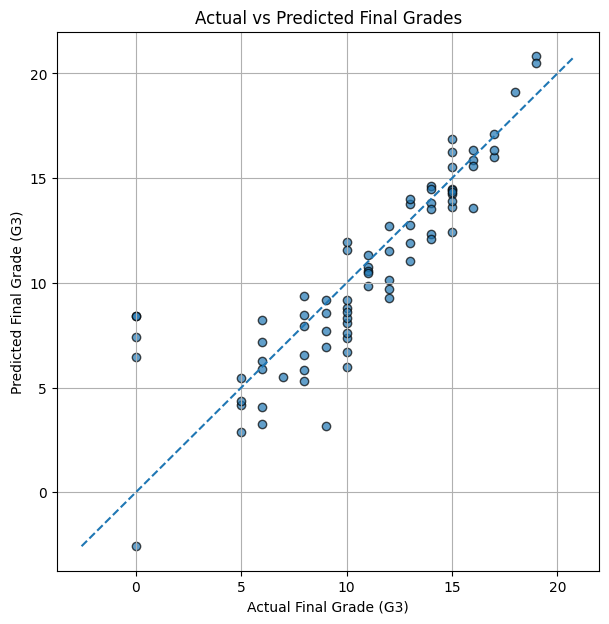

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(
    y_test, y_pred,
    alpha=0.7,
    edgecolors='black'
)

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs Predicted Final Grades")
plt.grid(True)

plt.show()
